In [1]:
import networkx as nx 
import random
import matplotlib.pyplot as plt
import numpy as np 
import math 
import copy 
import graphviz
from scipy.optimize import fsolve
from typing import List
import sympy as sp
from sympy import Symbol
from collections import deque
import pickle
import import_ipynb
from arrival_networkx import *
# from subexponential import *
# from faster_algo import *
import time
from iteration import *

importing Jupyter notebook from arrival_networkx.ipynb
importing Jupyter notebook from iteration.ipynb


## Runtimes of Run Procedure : Test 1

In [5]:
number_of_nodes = [10, 100, 1000, 10000]
avg_run_counts = []
for num in number_of_nodes:
    run_counts = []
    for i in range(1):
        instance = Arrival(num,True)
        instance.run_procedure()
        run_counts.append(instance.run_counter)
    avg_run_counts.append(sum(run_counts)/len(run_counts))    


[0.0]
[0.0]
[0.005000591278076172]
[0.06750321388244629]


Text(0.5, 1.0, 'Run Procedure for different number of nodes')

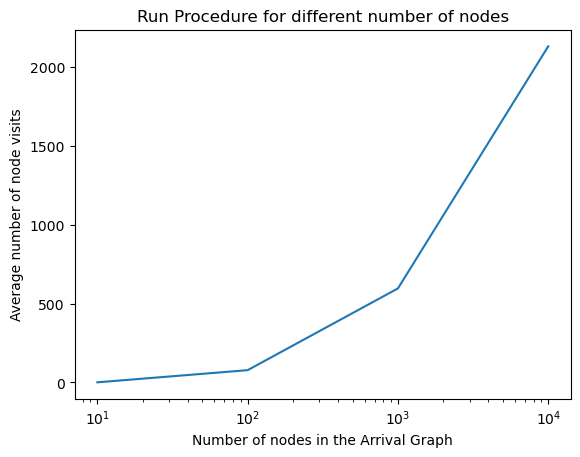

In [17]:
plt.semilogx(number_of_nodes, avg_run_counts)
plt.xlabel('Number of nodes in the Arrival Graph')
plt.ylabel('Average number of node visits')
plt.title('Run Procedure for different number of nodes')

In [ ]:
## run procedure for branch instance
number_of_nodes = [10, 20, 30, 40]
avg_run_counts = []
for num in number_of_nodes:
    run_counts = []
    for i in range(10):
        instance = get_branch_instance_without_random(num, 0.5)
        instance.run_procedure()
        run_counts.append(instance.run_counter)
    avg_run_counts.append(sum(run_counts)/len(run_counts))

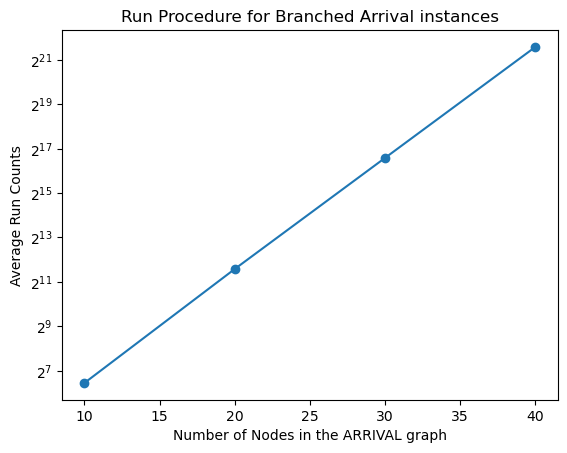

In [ ]:
# Create the plot
plt.figure()
plt.plot(number_of_nodes, avg_run_counts, marker='o')

# Set the yscale to 'log' and base to 2
plt.yscale('log', base=2)

# Set labels and title
plt.xlabel('Number of Nodes in the ARRIVAL graph')
plt.ylabel('Average number of nodes visited')

# # Enable grid and legend
# plt.grid(True, which="both", ls="--")
plt.title('Run Procedure for Branched Arrival instances')
# Show the plot
plt.show()


## Cluster instances (Test 2)

Text(0, 0.5, 'Average number of node visits')

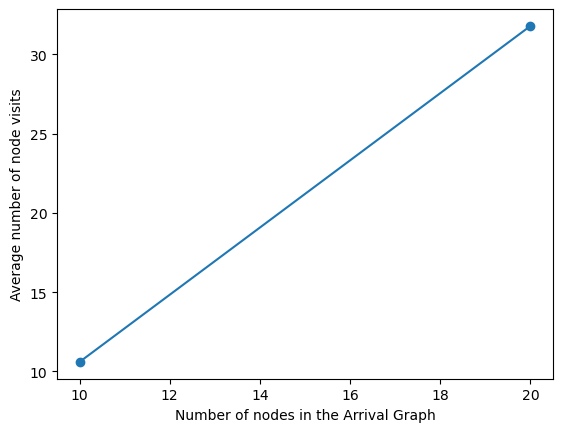

In [9]:
number_of_nodes = [10, 20,]
avg_run_counts = []
for num in number_of_nodes:
    run_counts = []
    for i in range(10):
        instance = get_partially_connected_cluster_instance(num, int(np.sqrt(num)))
        instance.run_procedure(verbose=False)
        run_counts.append(instance.run_counter)
    avg_run_counts.append(sum(run_counts)/len(run_counts))
    
plt.plot(number_of_nodes, avg_run_counts, marker='o')
plt.xlabel('Number of nodes in the Arrival Graph')
plt.ylabel('Average number of node visits')

## SUBEXPONENTIAL Algorithm (Test 3)

In [3]:
number_of_nodes = [10, 20, 30, 40]
avg_run_counts_without = []
avg_run_counts = []

for num in number_of_nodes:
    run_counts_without = []
    run_counts = []
    
    phi = get_optimal_phi(num)
    
    for r in range(2, 9, 1):
        branch_instance_without = get_branch_instance_without_random(num, r/10)
        branch_instance = get_branch_instance(num, r/10)
        
        sub_result_without = subexponential(branch_instance_without, phi)
        sub_result = subexponential(branch_instance, phi)
        
        run_counts_without.append(sub_result_without[-1])
        run_counts.append(sub_result[-1])
        
    avg_run_counts_without.append(sum(run_counts_without)/len(run_counts_without))
    avg_run_counts.append(sum(run_counts)/len(run_counts))

print(avg_run_counts)
    

S is  []
{}
t_d is  0 t_sink is  1.0 w is  {}
S is  []
{}
t_d is  0 t_sink is  1.0 w is  {}
S is  [6, 0]
{6: 0.0, 0: 19.0}
t_d is  0 t_sink is  1.0 w is  {6: 1.0, 0: 14.0}
S is  [6, 0]
{6: 0.0, 0: 18.0}
t_d is  0 t_sink is  1.0 w is  {6: 1.0, 0: 13.0}
S is  [6, 1, 4]
{6: 2.0, 1: 14.0, 4: 13.0}
t_d is  0 t_sink is  1.0 w is  {6: 2.0, 1: 9.0, 4: 9.0}
S is  [6, 1, 4]
{6: 3.0, 1: 13.0, 4: 12.0}
t_d is  0 t_sink is  1.0 w is  {6: 2.0, 1: 9.0, 4: 9.0}
S is  [6, 2, 0]
{6: 2.0, 2: 2.0, 0: 25.0}
t_d is  0.0 t_sink is  1.0 w is  {6: 5.0, 2: 5.0, 0: 19.0}
S is  [6, 2, 0]
{6: 2.0, 2: 2.0, 0: 25.0}
t_d is  1.0 t_sink is  0.0 w is  {6: 4.0, 2: 4.0, 0: 17.0}
S is  [6, 3, 1]
{6: 13.0, 3: 2.0, 1: 14.0}
t_d is  1.0 t_sink is  0 w is  {6: 12.0, 3: 3.0, 1: 12.0}
S is  [6, 3, 1]
{6: 13.0, 3: 2.0, 1: 13.0}
t_d is  1.0 t_sink is  0 w is  {6: 8.0, 3: 2.0, 1: 8.0}
S is  [0, 4]
{0: 19.0, 4: 0.0}
t_d is  1.0 t_sink is  0 w is  {0: 12.0, 4: 1.0}
S is  [0, 4]
{0: 16.0, 4: 1.0}
t_d is  1.0 t_sink is  0 w is  {0: 13

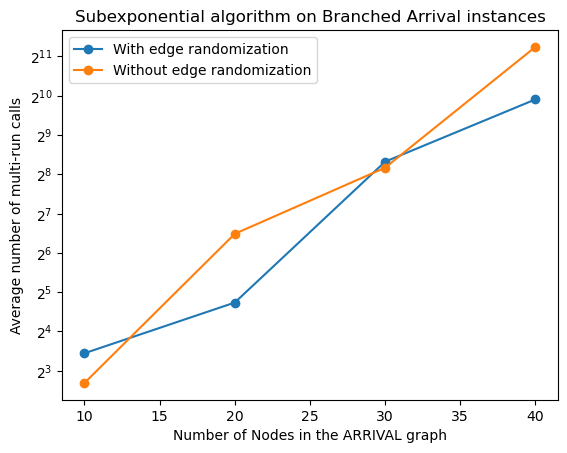

In [6]:
# Create the plot
plt.figure()
plt.plot(number_of_nodes, avg_run_counts, marker='o', label='With edge randomization')
plt.plot(number_of_nodes, avg_run_counts_without, marker='o', label='Without edge randomization')

# Set the yscale to 'log' and base to 2
plt.yscale('log', base=2)

# Set labels and title
plt.xlabel('Number of Nodes in the ARRIVAL graph')
plt.ylabel('Average number of multi-run calls')

# # Enable grid and legend
# plt.grid(True, which="both", ls="--")
plt.legend()
plt.title('Subexponential algorithm on Branched Arrival instances')
# Show the plot
plt.show()

## Iteration Algorithm (Test 4)

In [3]:
### iteration for branch instances

number_of_nodes = [10, 15] 
avg_run_counts_without = [] ##[1057.142857142857, 32899.71428571428]
avg_run_counts = []
for num in number_of_nodes:
    run_counts = []
    run_counts_without = []
    for r in range(2, 5, 1):
        instance = get_branch_instance(num, r/10)
        # instance_without = get_branch_instance_without_random(num, r/10)
        
        x0 = np.zeros(len(instance.X))
        # iter_result_without = iteration(instance_without.evaluate, x0, verbose=True)
        iter_result = iteration(instance.evaluate, x0, verbose=True)
        
        run_counts.append(instance.function_calls)
        # run_counts_without.append(instance_without.function_calls)
    
    avg_run_counts.append(sum(run_counts)/len(run_counts))
    # avg_run_counts_without.append(sum(run_counts_without)/len(run_counts_without))
    
    
print(avg_run_counts)

iteration 0 : [0 1 0 0 0 0 0 0 0 0 0]
Fixed point calculation converged in 1026 iterations. [1024 1 1 0 0 0 0 0 0 0 0]
iteration 0 : [0 1 0 0 0 0 0 0 0 0 0]
Fixed point calculation converged in 1041 iterations. [1024 7 4 2 3 1 0 0 0 0 0]
iteration 0 : [0 1 0 0 0 0 0 0 0 0 0]
Fixed point calculation converged in 1033 iterations. [1024 3 2 1 1 1 1 0 0 0 0]
iteration 0 : [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
iteration 10000 : [9998 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
iteration 20000 : [19998 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
iteration 30000 : [29998 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
Fixed point calculation converged in 32771 iterations. [32768 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
iteration 0 : [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
iteration 10000 : [9968 12 6 3 2 6 3 1 0 0 0 0 0 0 0 0]
iteration 20000 : [19968 12 6 3 2 6 3 1 0 0 0 0 0 0 0 0]
iteration 30000 : [29968 12 6 3 2 6 3 1 0 0 0 0 0 0 0 0]
Fixed point calculation converged in 32801 iterations. [32768 12 6 3 2 6 3 1 0 0 0 0 0 0 0 0]
iteration 0 : [0 1 0 0 

In [4]:
###  results of iteration algorithm on branch instances
avg_run_counts_without = [1057.142857142857, 32899.71428571428]
avg_run_counts =  [1034.3333333333333, 32837.333333333336]

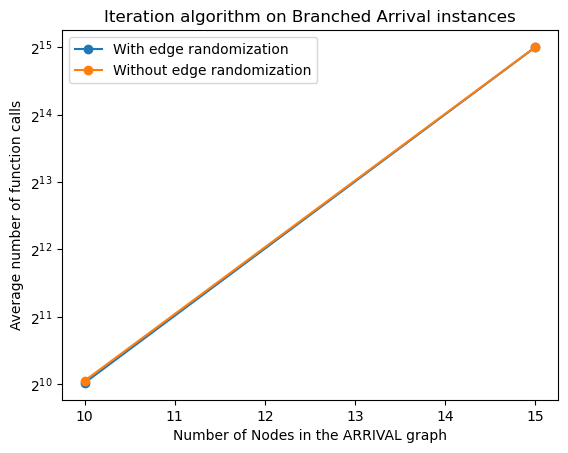

In [5]:
plt.figure()
plt.plot(number_of_nodes, avg_run_counts, marker='o', label='With edge randomization')
plt.plot(number_of_nodes, avg_run_counts_without, marker='o', label='Without edge randomization')

# Set the yscale to 'log' and base to 2
plt.yscale('log', base=2)

# Set labels and title
plt.xlabel('Number of Nodes in the ARRIVAL graph')
plt.ylabel('Average number of function calls')

# # Enable grid and legend
# plt.grid(True, which="both", ls="--")
plt.legend()
plt.title('Iteration algorithm on Branched Arrival instances')
# Show the plot
plt.show()

## Test 4

In [2]:
### iteration for normal instances

number_of_nodes = [10, 20] 
avg_run_counts = []
for num in number_of_nodes:
    run_counts = []
    for r in range( 1):
        instance = Arrival(num, True)
        
        x0 = np.zeros(len(instance.X))
        iter_result = iteration(instance.evaluate_lambda, x0, verbose=True)
        
        run_counts.append(instance.function_calls)
    
    avg_run_counts.append(sum(run_counts)/len(run_counts))
    
    
print(avg_run_counts)
# output received  [[6178,11029,2050],[ 14571163,2097153,12680240]]

iteration 0 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Fixed point calculation converged in 6178 iterations. [   0.  577. 1024.    0.  128. 2048.  512. 1441.  128.   64.  256.]
iteration 0 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
iteration 10000 : [   0.  592.  760. 1858. 1183.  296. 1130. 1225. 1457.  908.  592.]
Fixed point calculation converged in 11029 iterations. [   0.  653.  839. 2048. 1305.  327. 1246. 1350. 1607. 1001.  653.]
iteration 0 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Fixed point calculation converged in 2050 iterations. [2.048e+03 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 1.000e+00 0.000e+00]
iteration 0 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
iteration 10000 : [0.00e+00 1.00e+00 3.42e+02 0.00e+00 2.36e+02 5.49e+02 6.18e+02 5.52e+02
 8.91e+02 0.00e+00 1.72e+02 7.71e+02 2.76e+02 0.00e+00 4.71e+02 1.44e+03
 7.20e+02 6.84e+02 8.21e+02 8.22e+02 6.35e+02]
iteration 20000 : [0.000e+00 1.000e+00 6.850e+02 0.000e+00 4.720e

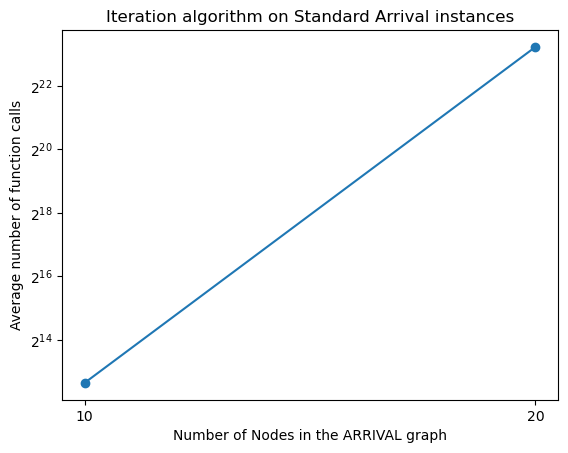

In [5]:
plt.figure()
plt.plot(number_of_nodes, avg_run_counts, marker='o')

# Set the yscale to 'log' and base to 2
plt.yscale('log', base=2)

# Set labels and title
plt.xlabel('Number of Nodes in the ARRIVAL graph')
plt.ylabel('Average number of function calls')
## set x label to number of nodes
plt.xticks(number_of_nodes)

# # Enable grid and legend
# plt.grid(True, which="both", ls="--")
plt.title('Iteration algorithm on Standard Arrival instances')
# Show the plot
plt.show()

test 2


In [ ]:
number_of_nodes = [ 10,20,30,40]
avg_run_counts = {}
for num in number_of_nodes:
    run_counts = {}
    phi = get_optimal_phi(num)
    for k in range(2, 4):
        cluster_sub_counts = []
        
        for i in range(1):
            instance = Arrival(num-1 , True)
            sub_result = subexponential(instance, phi)
            cluster_sub_counts.append(sub_result[-1])
       
        run_counts[k]  =  sum(cluster_sub_counts)/len(cluster_sub_counts)
        
    avg_run_counts[num] = run_counts
    print(avg_run_counts)

{-1: 0, 0: 1, 1: 1, 8: 0, 6: 1, 2: 1, 3: 1, 4: 1, 5: 1, 7: 1}
1
S is  []
{}
t_d is  0 t_sink is  1.0 w is  {}
{-1: 0, 0: 1, 8: 0, 4: 2, 1: 3, 6: 2, 2: 1, 3: 3, 7: 3, 5: 2}
3
S is  []
{}
t_d is  1.0 t_sink is  0 w is  {}
{10: {2: 1.0, 3: 1.0}}
{-1: 0, 0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 0}
1
S is  []
{}
t_d is  0 t_sink is  1.0 w is  {}
{-1: 0, 0: 5, 11: 4, 2: 4, 1: 5, 13: 4, 7: 4, 15: 3, 3: 3, 17: 5, 16: 2, 4: 1, 18: 0, 5: 3, 8: 2, 6: 2, 9: 1, 10: 2, 12: 3, 14: 4}
5
S is  [1, 0, 17]
{1: 5.0, 0: 1, 17: 14.0}
t_d is  1.0 t_sink is  0 w is  {1: 1.0, 0: 1, 17: 1.0}
{10: {2: 1.0, 3: 1.0}, 20: {2: 1.0, 3: 9.0}}
{-1: 0, 0: 4, 24: 3, 12: 4, 1: 2, 13: 1, 2: 5, 4: 4, 3: 3, 6: 3, 19: 2, 8: 5, 5: 2, 16: 4, 27: 2, 7: 3, 26: 4, 9: 4, 10: 3, 11: 1, 28: 0, 14: 3, 15: 3, 17: 3, 18: 1, 23: 5, 20: 4, 21: 2, 22: 2, 25: 2}
5
S is  [2, 23, 8]
{2: 9.0, 23: 4.0, 8: 2.0}
t_d is  1.0 t_sink is  0 w is  {2: 1.0, 23: 0, 8: 0.0}
{-

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


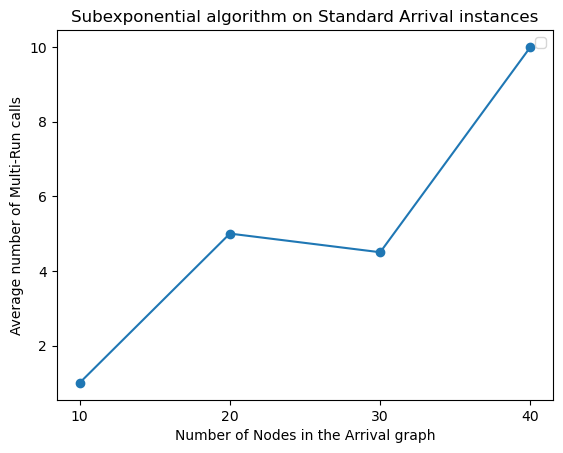

In [ ]:
x = list(avg_run_counts.keys())
y1 = [sum(avg_run_counts[k].values())/2  for k in x]

# Plotting
plt.plot(x, y1, marker='o')
plt.xticks(x)
plt.xlabel('Number of Nodes in the Arrival graph')
plt.ylabel('Average number of Multi-Run calls')
plt.title('Subexponential algorithm on Standard Arrival instances')
plt.legend()
plt.show()